In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sklearn
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from IPython.display import Image

In [ ]:
df = pd.read_excel('shoe.xlsx')

In [ ]:
df.head()

,size(cm),class(y)
0,9.500,Female
1,10.125,Male
2,10.410,Male
3,9.810,Female
4,11.050,Male


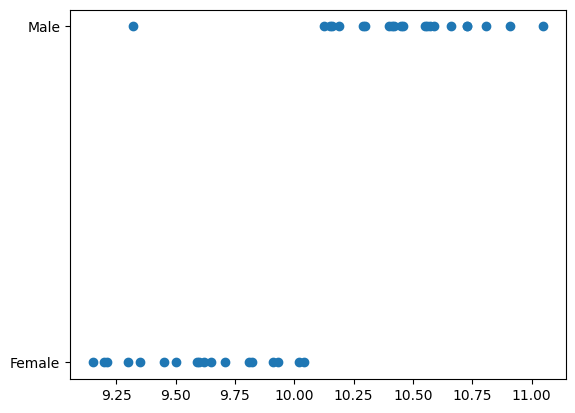

In [ ]:
plt.scatter(df['size(cm)'],df['class(y)'])

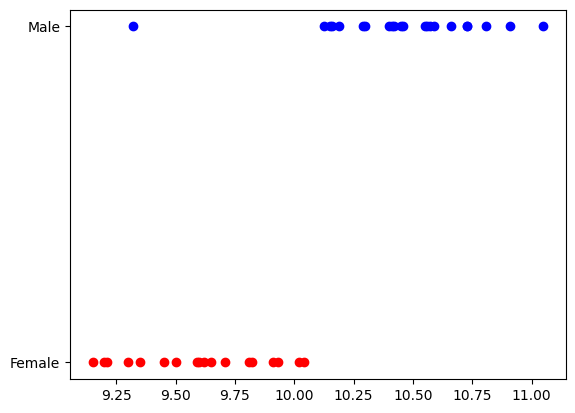

In [ ]:
df0 = df[df['class(y)']=='Female']
df1 = df[df['class(y)']=='Male']

plt.scatter(df0['size(cm)'],df0['class(y)'],color = 'red',label='Female')
plt.scatter(df1['size(cm)'],df1['class(y)'],color = 'blue',label='Male')


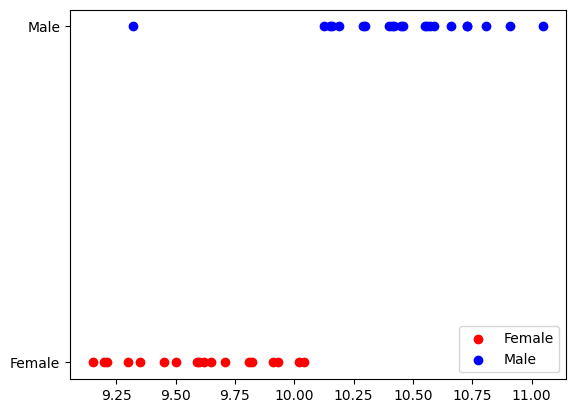

In [ ]:
df0 = df[df['class(y)']=='Female']
df1 = df[df['class(y)']=='Male']

plt.scatter(df0['size(cm)'],df0['class(y)'],color = 'red',label='Female')
plt.scatter(df1['size(cm)'],df1['class(y)'],color = 'blue',label='Male')
plt.legend()


**Preprocessing**

In [ ]:
df['class(y)'] = df['class(y)'].replace(['Male','Female'],[1,0])

In [ ]:
df.head()

,size(cm),class(y)
0,9.500,0
1,10.125,1
2,10.410,1
3,9.810,0
4,11.050,1


In [ ]:
from sklearn.model_selection import train_test_split as tts

In [ ]:
xtrain,xtest,ytrain,ytest = tts(df[['size(cm)']],df[['class(y)']],test_size=0.3,random_state=55)

In [ ]:
xtrain.head()

,size(cm)
31,9.91
25,10.46
36,9.21
14,10.55
16,10.02


In [ ]:
ytrain.head()

,class(y)
31,0
25,1
36,0
14,1
16,0


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
reg = LogisticRegression()

In [ ]:
reg.fit(xtrain,ytrain)

LogisticRegression()

In [ ]:
m = reg.coef_

In [ ]:
m

array([[2.1074641]])

In [ ]:
c = reg.intercept_

In [ ]:
c

array([-20.81431688])

In [ ]:
pred = reg.predict(xtest)
pred

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1])

In [ ]:
reg.predict_proba(xtest)

array([[0.80622218, 0.19377782],
       [0.53496634, 0.46503366],
       [0.24519892, 0.75480108],
       [0.64167958, 0.35832042],
       [0.71069895, 0.28930105],
       [0.35975129, 0.64024871],
       [0.47182945, 0.52817055],
       [0.82215555, 0.17784445],
       [0.07776121, 0.92223879],
       [0.22993416, 0.77006584],
       [0.61710734, 0.38289266],
       [0.29058112, 0.70941888]])

In [ ]:
ytest.head()

,class(y)
22,0
3,0
2,1
38,0
6,0


In [ ]:
Log_score = reg.score(xtest,ytest)

In [ ]:
Log_score

0.9166666666666666

In [ ]:
mae1 = mean_absolute_error(ytest,pred)

In [ ]:
mae1

0.08333333333333333

In [ ]:
mse1 = mean_squared_error(ytest,pred)

In [ ]:
mse1

0.08333333333333333

In [ ]:
data = {'Name':['Logistic_mae','Logistic_mse','Logistic_accuracy'],
        'Accuracy':[mae1,mse1,Log_score]}
df_after_pred = pd.DataFrame(data=data)

In [ ]:
df_after_pred.head()

,Name,Accuracy
0,Logistic_mae,0.083333
1,Logistic_mse,0.083333
2,Logistic_accuracy,0.916667


In [ ]:
import seaborn as sns

<Axes: xlabel='Accuracy', ylabel='Name'>

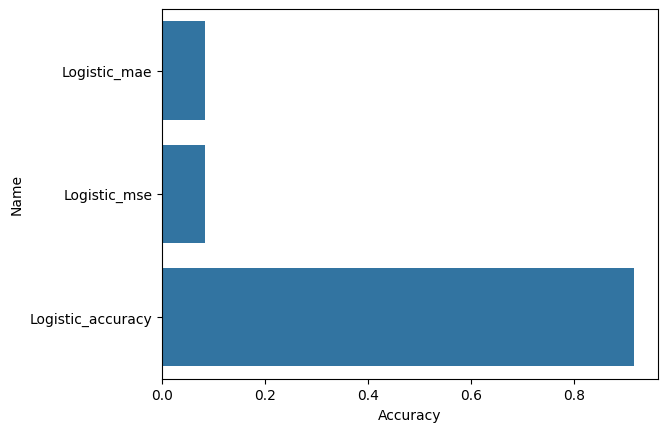

In [ ]:
sns.barplot(x='Accuracy',y='Name',data=df_after_pred)